## Import of Required Packages

In [1]:
# Import necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Training Data Set

In [2]:
df = pd.read_csv('data/train.csv')
df_org = df
# df_org

## Summary of Dataframe

In [3]:
# df.head(10)
# df.tail(10)
# df.columns
# df.dtypes
# df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   row_id    26298 non-null  int64 
 1   date      26298 non-null  object
 2   country   26298 non-null  object
 3   store     26298 non-null  object
 4   product   26298 non-null  object
 5   num_sold  26298 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.2+ MB


### Types of Variables

In [4]:
df.dtypes

row_id       int64
date        object
country     object
store       object
product     object
num_sold     int64
dtype: object

#### Finding of Categorical Variables

In [5]:
cat_var = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables'.format(len(cat_var)))

There are 4 categorical variables


In [6]:
df[cat_var].head()

,date,country,store,product
0,2015-01-01,Finland,KaggleMart,Kaggle Mug
1,2015-01-01,Finland,KaggleMart,Kaggle Hat
2,2015-01-01,Finland,KaggleMart,Kaggle Sticker
3,2015-01-01,Finland,KaggleRama,Kaggle Mug
4,2015-01-01,Finland,KaggleRama,Kaggle Hat


In [7]:
# # plot median Sales per date

# df.groupby('date')['num_sold'].median().plot()
# plt.title('Sales variation along date')
# plt.ylabel('median Sales')

### Finding of Numerical Variables

In [8]:
# make a list of the numerical variables first
num_var = [var for var in df.columns if df[var].dtype!='O']
df[num_var].head()

,row_id,num_sold
0,0,329
1,1,520
2,2,146
3,3,572
4,4,911


In [9]:
# row_id variable should not be used for predictions as it's unique identifier for each row.

print('No. of Unique identifier for column "row_id" : ',len(df['row_id'].unique()))
print('Total No of Rows in Table : ',len(df))

No. of Unique identifier for column "row_id" :  26298
Total No of Rows in Table :  26298


In [10]:
# need to skip row_id variable & target variable num_sold
num_var.remove('row_id')
num_var.remove('num_sold')

### Find discrete variables
To identify discrete variables, I will select from all the numerical ones, those that contain a finite and small number of distinct values(<20). 

In [11]:
# Need to skip row_id variable and the target variable num_sold
# So, no further Numerical variables & Discrete variables.
dis_var = []

### Find Temporal Variables

In [12]:
temp_var = ['date']
cat_var.remove('date')
# temp_var
# cat_var 


In [13]:
cat_var

['country', 'store', 'product']

## Feature Engineering

## Variable Characteristics

### Temporal variables
Date to "day_of_week" & "weekend" derivation to figure out any weekday purchase trend


In [14]:
df_date = pd.to_datetime(df['date'])
# df['day_of_week'] = df_date.dt.day_name() ## to retrive Weekday Name
df['day_of_week'] = df_date.dt.day_of_week

# X_train['day_of_week'] = pd.to_datetime(X_train['date']).dt.day_of_week
# X_test['day_of_week'] = pd.to_datetime(X_test['date']).dt.day_of_week

In [15]:
df["day_of_week"].value_counts()
dis_var.append('day_of_week')

In [16]:
def is_weekend (row):
   if row['day_of_week'] < 5 :
      return 0
   else:
      return 1

df['weekend'] = df.apply (lambda row: is_weekend(row), axis=1)
# X_train['weekend'] = X_train.apply (lambda row: is_weekend(row), axis=1)
# X_test['weekend'] = X_test.apply (lambda row: is_weekend(row), axis=1)

In [17]:
df['weekend'].value_counts()
dis_var.append('weekend')

### Derivation of month & year from date field

In [18]:
df['month'] = df_date.dt.month
df['year'] = df_date.dt.year
df['month'].value_counts()
df["year"].value_counts()

dis_var.append('month')
dis_var.append('year')

# X_train['month'] = pd.to_datetime(X_train['date']).dt.month
# X_train['year'] = pd.to_datetime(X_train['date']).dt.year

# X_test['month'] = pd.to_datetime(X_test['date']).dt.month
# X_test['year'] = pd.to_datetime(X_test['date']).dt.year

### Creation of "us_holiday" to uncover any purchase trend during hoidays

In [19]:
import holidays
import datetime

# year = df['date'].str.slice(0,4)
# year_unq = year.unique()

holidays_us = []

for date in holidays.UnitedStates(years=[2015,2016,2017,2018]).items():  ## ?? need to change for dynamic year selection
        holidays_us.append(str(date[0]))
    

df['us_holiday'] = [
    1 if val in holidays_us else 0 for val in df['date']]

    
df['us_holiday'].value_counts()
dis_var.append('us_holiday')
    
# X_train['us_holiday'] = [
#     1 if val in holidays_us else 0 for val in X_train['date']
# ]

# X_test['us_holiday'] = [
#     1 if val in holidays_us else 0 for val in X_test['date']
# ]

Instead of the "date", now we have day_of_week, us_holiday, weekend, month & year . Next, we drop the date variable from the datasets, because we already extracted its value.

In [20]:
# drop date
# df.drop('date', axis=1, inplace=True)

temp_var.remove('date')


# X_train.drop('date', axis=1, inplace=True)
# X_test.drop('date', axis=1, inplace=True)

In [21]:
# df.columns
num_var+dis_var+cat_var+temp_var

['day_of_week',
 'weekend',
 'month',
 'year',
 'us_holiday',
 'country',
 'store',
 'product']

In [22]:
# # capture the column names for use later in the notebook
# # final_columns = X_train.columns

# dis_var.extend(['day_of_week', 'weekend','month','year','us_holiday'])

# # cat_var.remove('date')

# # num_var.remove('row_id') 
# # num_var.remove('num_sold')

# final_columns = cat_var + dis_var + num_var

### Missing Values

In [23]:
df.info() 
df.isnull().sum()# no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       26298 non-null  int64 
 1   date         26298 non-null  object
 2   country      26298 non-null  object
 3   store        26298 non-null  object
 4   product      26298 non-null  object
 5   num_sold     26298 non-null  int64 
 6   day_of_week  26298 non-null  int64 
 7   weekend      26298 non-null  int64 
 8   month        26298 non-null  int64 
 9   year         26298 non-null  int64 
 10  us_holiday   26298 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 2.2+ MB


row_id         0
date           0
country        0
store          0
product        0
num_sold       0
day_of_week    0
weekend        0
month          0
year           0
us_holiday     0
dtype: int64

In [24]:
#Below codes are not required as there is no missing values
# let's output variables with NA and the percentage of NA

for var in df.columns:
    if df[var].isnull().sum() > 0:
        print(var, df[var].isnull().mean())

### Cardinality

Text(0, 0.5, 'Number of different categories')

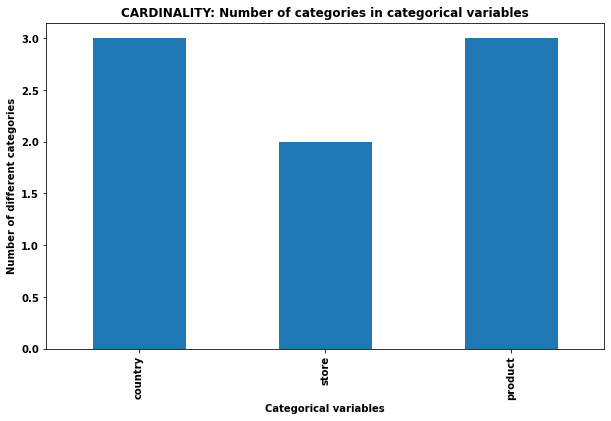

In [25]:
# plot number of categories per categorical variable

df[cat_var].nunique().plot.bar(figsize=(10,6))
plt.title('CARDINALITY: Number of categories in categorical variables')
plt.xlabel('Categorical variables')
plt.ylabel('Number of different categories')

So, Cardinality of all Categorical Variables are moderate..They are not very high.

In [26]:
# print('Number of categories in the variable date: {}'.format(len(df.date.unique())))
# print('Number of categories in the variable country: {}'.format(len(df.country.unique())))
# print('Number of categories in the variable store: {}'.format(len(df.store.unique())))
# # print('Number of categories in the variable product: {}'.format(len(df.product.unique()))) # ??
# print('Number of categories in the variable product: {}'.format(len(df["product"].unique())))

### Rare Label Identification

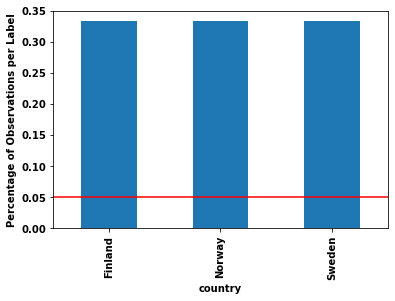

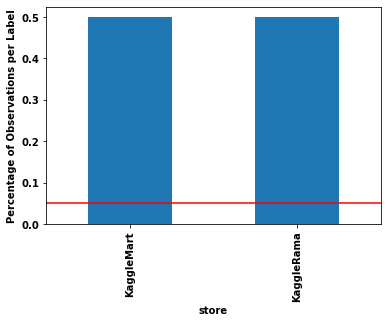

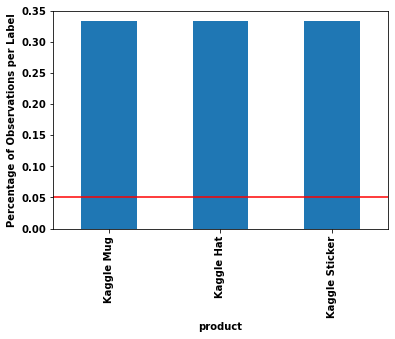

In [27]:
# plot how frequently each label appears in the dataset for Categorical Variables


# for each categorical variable
for var in cat_var:

    # count number of records per label of category and divide by total records

    temp_df = pd.Series(df[var].value_counts() / len(df))

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(var)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of Observations per Label')
    plt.show()

So, Frequency of Labels of of any Categorical Variable are almost same..There is not much difference among them. So no Rare label exists.

### Variable Transformation

### Identification of Skewed Variables

· Skewness is a measure of asymmetry of a distribution.
· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
· If the skewness is less than -1 or greater than 1, the data are highly skewed

In [28]:
# df.skew(axis=1)
skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df[num_var+dis_var].skew()
# skew_vals

In [29]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
us_holiday,5.431557
weekend,0.946617


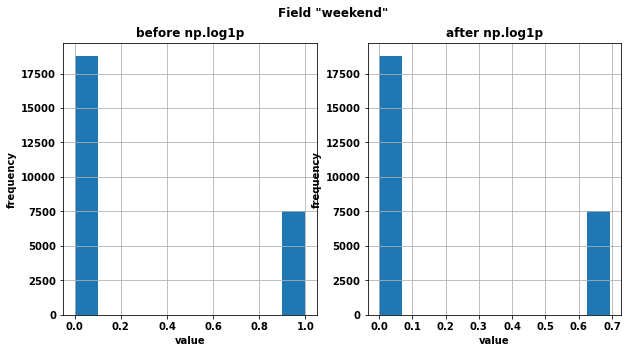

In [30]:
# Let's look at what happens to one of these above skewed features, when we apply np.log1p visually.

# Choose a field
# field = "us_holiday"
field = "weekend"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

### Outliers in dataset

· Kurtosis is one of the two measures that quantify shape of a distribution. kutosis determine the volume of the outlier

· If the distribution is tall and thin it is called a leptokurtic distribution(Kurtosis > 3). Values in a leptokurtic distribution are near the mean or at the extremes.

· A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called platykurtic(Kurtosis <3) distribution.

· A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a mesokurtic(Kurtosis=3) distribution. A mesokurtic distribution looks more close to a normal distribution.

In [31]:
kurt_limit = 3 # define a limit above which we will log transform
kurt_vals = df[num_var+dis_var].kurt()
kurt_vals

# # Showing the skewed columns
# kurt_cols = (kurt_vals
#              .sort_values(ascending=False)
#              .to_frame()
#              .rename(columns={0:'Kurt'})
#              .query('abs(Kurt) > {}'.format(kurt_limit)))

# kurt_cols

day_of_week    -1.250131
weekend        -1.103999
month          -1.208058
year           -1.359328
us_holiday     27.503903
dtype: float64

### Pair plot of Features

Now that we have a nice, filtered dataset, let's generate visuals to better understand the target and feature-target relationships: pairplot is great for this!

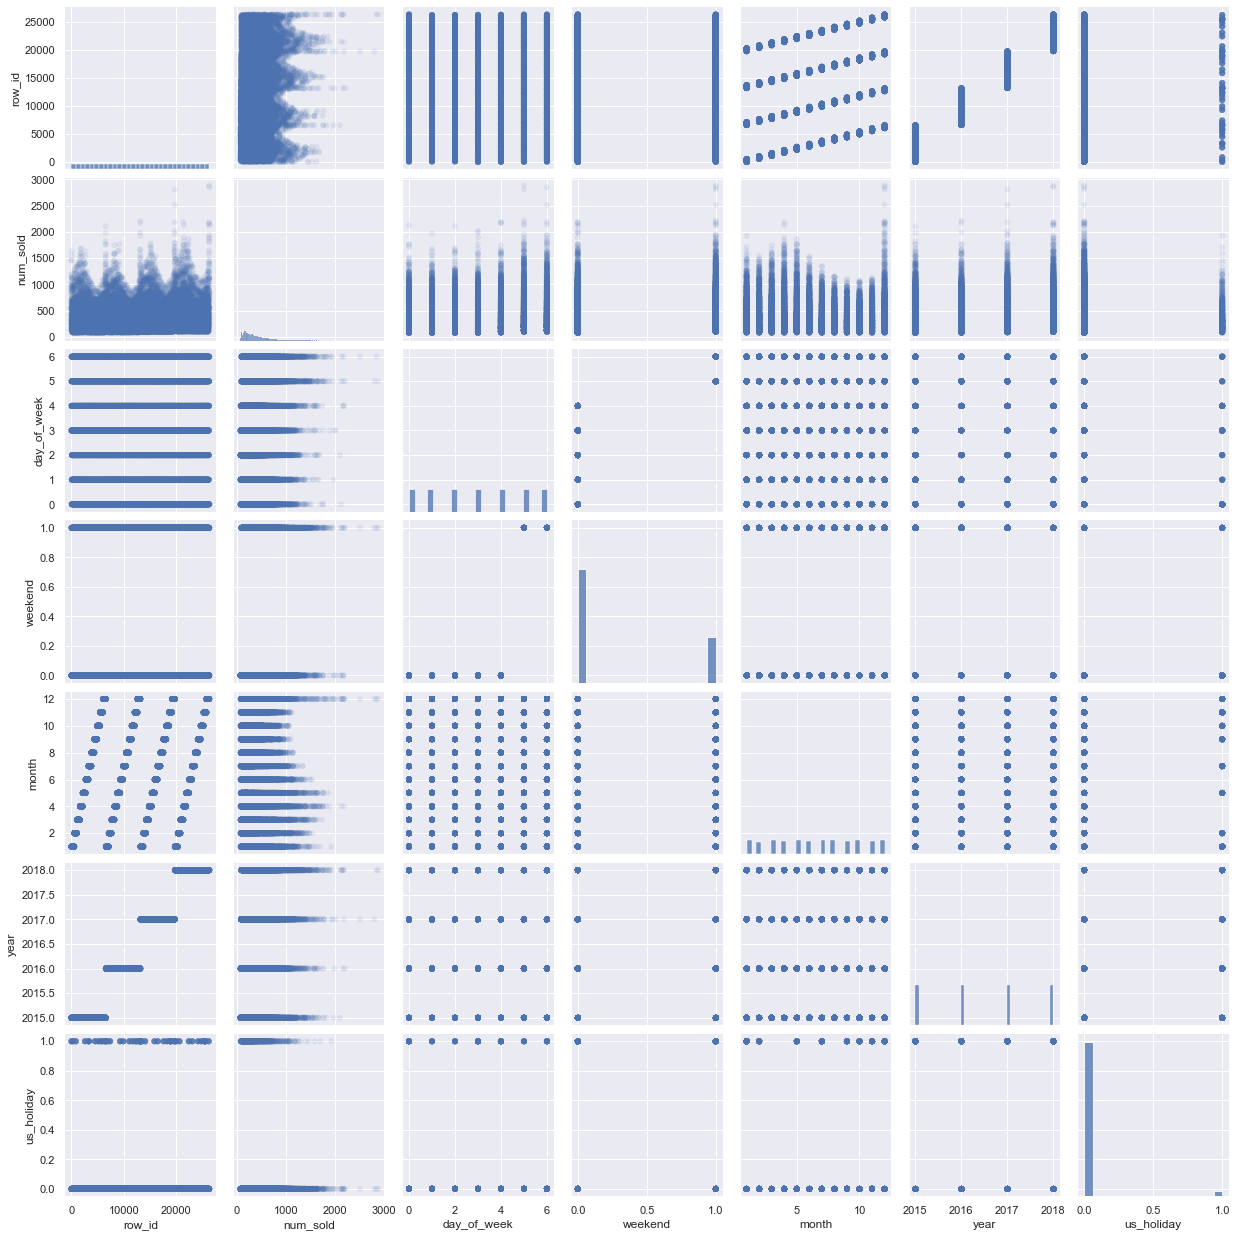

In [32]:
import seaborn as sns
sns.set()
df['num_sold']=df_org['num_sold']
sns.pairplot(df, plot_kws=dict(alpha=.1, edgecolor='none'))

### Plots to assess normality

To visualise the distribution of the variables, we plot a histogram and a Q-Q plot. In the Q-Q pLots, if the variable is normally distributed, the values of the variable should fall in a 45 degree line when plotted against the theoretical quantiles.

In [33]:
# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots

import scipy.stats as stats

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    
    plt.xlabel(variable)
    plt.ylabel('No of Occurance')

    plt.show()

In [34]:
df[dis_var].dtypes

day_of_week    int64
weekend        int64
month          int64
year           int64
us_holiday     int64
dtype: object

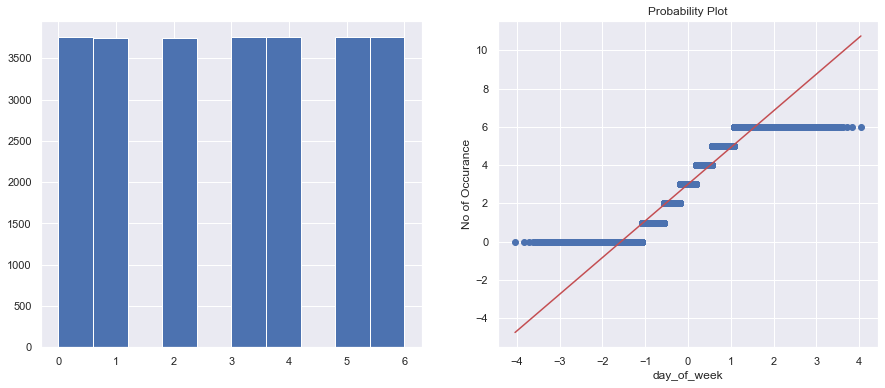

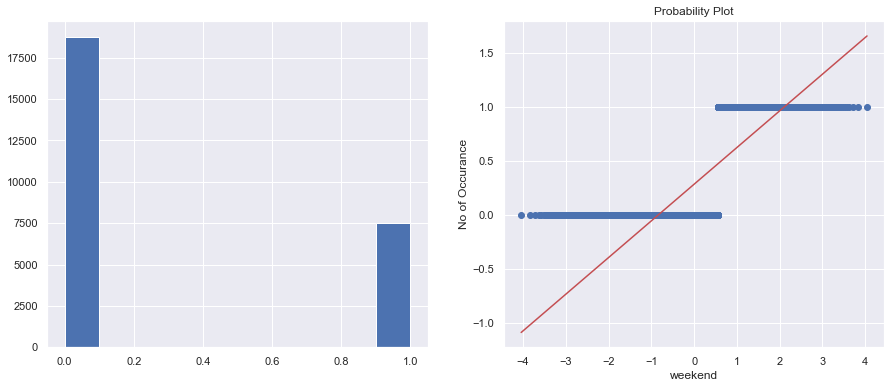

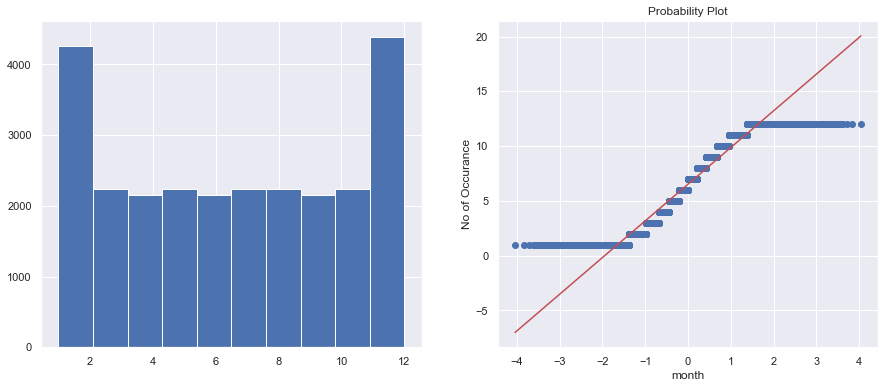

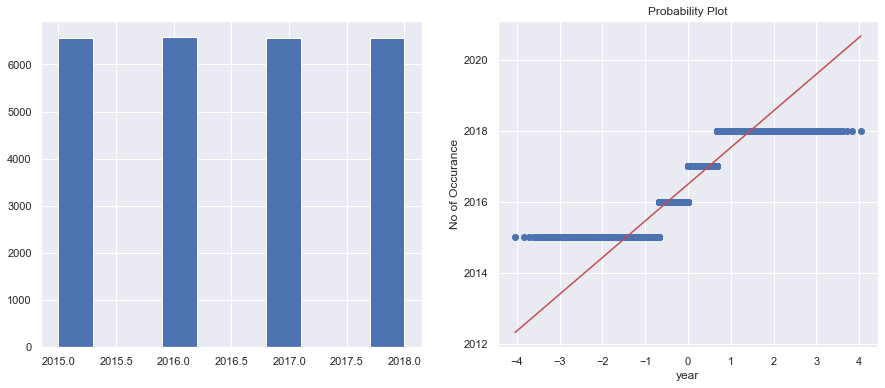

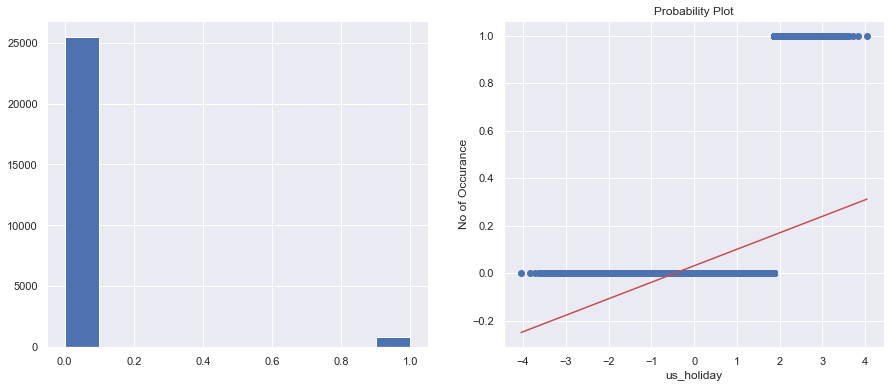

In [35]:
for var in dis_var:
    diagnostic_plots(df,var)

Log Transformer

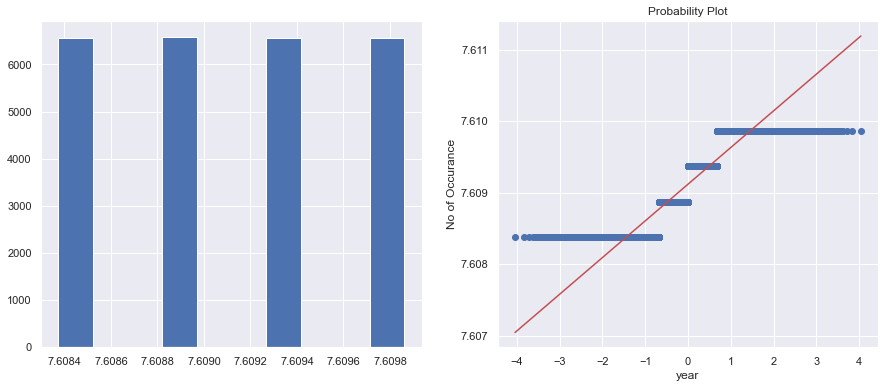

In [36]:
import feature_engine.transformation as vt
lt = vt.LogTransformer(variables = ['year'])
lt.fit(df)
df_tf = lt.transform(df)
diagnostic_plots(df_tf, 'year')

Reciprocal Transformer

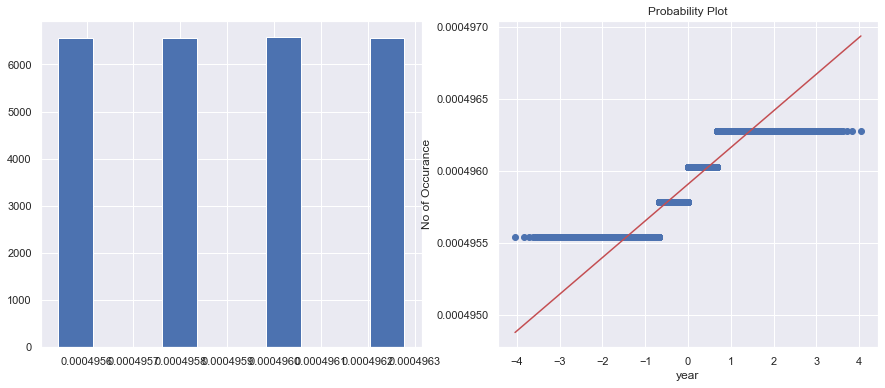

In [37]:
import feature_engine.transformation as vt
lt = vt.ReciprocalTransformer(variables = ['year'])
lt.fit(df)
df_tf = lt.transform(df)
diagnostic_plots(df_tf, 'year')

Exponential Transformer

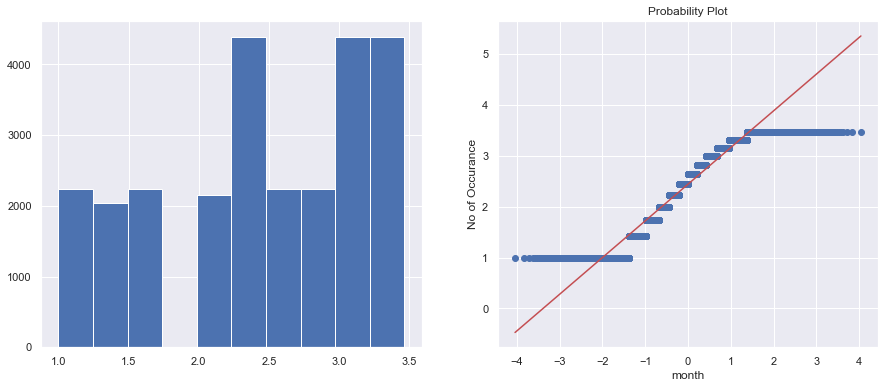

In [38]:
import feature_engine.transformation as vt
lt = vt.PowerTransformer(variables = ['month'])
lt.fit(df)
df_tf = lt.transform(df)
diagnostic_plots(df_tf, 'month')

BoxCox Transformer

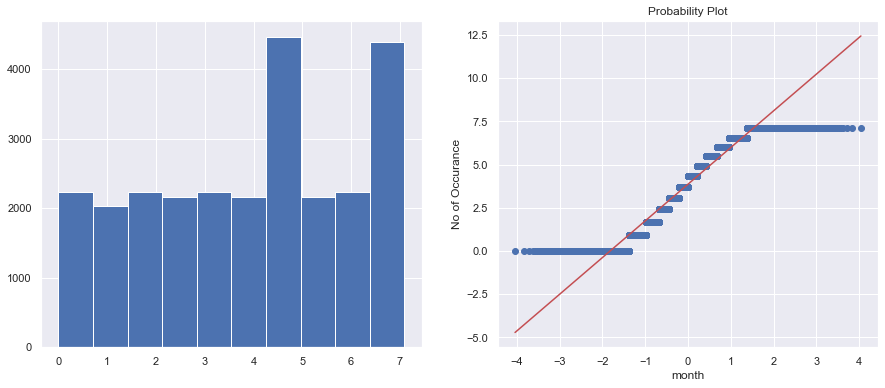

In [39]:
import feature_engine.transformation as vt
lt = vt.BoxCoxTransformer(variables = ['month'])
lt.fit(df)
df_tf = lt.transform(df)
diagnostic_plots(df_tf, 'month')

### Separate train and test set

In [40]:
final_var = num_var+dis_var+cat_var
# final_var

In [41]:
# Let's separate into train and test set

from sklearn.model_selection import train_test_split

# Let's separate into train and test set



X_train, X_test, y_train, y_test = train_test_split(df[final_var],
                                                    df['num_sold'],
                                                    test_size=0.3,
                                                    random_state=0)

# X_train, X_test, y_train, y_test = train_test_split(df.drop(['row_id', 'num_sold'], axis=1),
#                                                     df['num_sold'],
#                                                     test_size=0.3,
#                                                     random_state=0)

X_train.shape, X_test.shape

((18408, 8), (7890, 8))

In [42]:
X_train.dtypes
dis_var

['day_of_week', 'weekend', 'month', 'year', 'us_holiday']

In [43]:
# I will treat discrete variables as if they were categorical
# to treat discrete as categorical using Feature-engine
# we need to re-cast them as object

X_train[dis_var] = X_train[dis_var].astype('O')
X_test[dis_var] = X_test[dis_var].astype('O')

In [44]:
X_train.dtypes

day_of_week    object
weekend        object
month          object
year           object
us_holiday     object
country        object
store          object
product        object
dtype: object

### Missing data imputation
No missing data...so this step is not required

In [45]:
# for the model
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# for feature engineering
from sklearn.preprocessing import StandardScaler
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce


goods_pipe = Pipeline([

#     # missing data imputation
#     ('missing_ind', mdi.AddMissingIndicator(
#         variables=['country', 'store',  'product'])),
    
#     ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',
#                                           variables=['country', 'store',  'product'])),
    
#     ('imputer_cat', mdi.CategoricalImputer(variables=cat_var)),

#     # categorical encoding
#     ('rare_label_enc', ce.RareLabelEncoder(
#         tol=0.05, n_categories=6, variables=cat_var+dis_var)),
        
    
#     ('categorical_enc', ce.OrdinalEncoder(
#         encoding_method='ordered', variables=cat_var+dis_var)),
    
    ('categorical_enc', ce.OneHotEncoder(variables=cat_var+dis_var)),

#     # discretisation + encoding
#     ('discretisation', dsc.EqualFrequencyDiscretiser(
#         q=5, return_object=True, variables=num_var)),
    
#     ('encoding', ce.OrdinalEncoder(
#         encoding_method='ordered', variables=num_var)),

    # feature Scaling 
    ('scaler', StandardScaler()),
    
    # regression
    ('lasso', Lasso(random_state=0))
])

In [46]:
# let's fit the pipeline
goods_pipe.fit(X_train, y_train)

Pipeline(steps=[('categorical_enc',
                 OneHotEncoder(variables=['country', 'store', 'product',
                                          'day_of_week', 'weekend', 'month',
                                          'year', 'us_holiday'])),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(random_state=0))])

In [47]:
# let's get the predictions
X_train_preds = goods_pipe.predict(X_train)

In [48]:
X_test_preds = goods_pipe.predict(X_test)

In [49]:
# a peek into the prediction values
X_train_preds

array([380.00822174, 789.68584125, 684.95578148, ..., 198.37613976,
       145.74851572, -11.6357887 ])

In [50]:
# check model performance:

from math import sqrt

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

train mse: 14173.125951165239
train rmse: 119.05093847242549
train r2: 0.7991319179295624

test mse: 14359.26400720702
test rmse: 119.83014648746375
test r2: 0.798721982437818


Text(0, 0.5, 'Predicted No of Goods Sold')

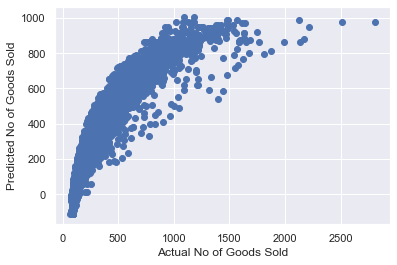

In [51]:
# plot predictions vs real value

plt.scatter(y_test,X_test_preds)
plt.xlabel('Actual No of Goods Sold')
plt.ylabel('Predicted No of Goods Sold')

In [52]:
final_var
X_train

,day_of_week,weekend,month,year,us_holiday,country,store,product
26004,5,1,12,2018,0,Sweden,KaggleMart,Kaggle Mug
2980,0,0,6,2015,0,Norway,KaggleRama,Kaggle Hat
9382,6,1,6,2016,0,Finland,KaggleRama,Kaggle Hat
19897,2,0,1,2018,0,Norway,KaggleMart,Kaggle Hat
1023,3,0,2,2015,0,Sweden,KaggleRama,Kaggle Mug
...,...,...,...,...,...,...,...,...
13123,4,0,12,2016,0,Finland,KaggleMart,Kaggle Hat
19648,2,0,12,2017,0,Norway,KaggleRama,Kaggle Hat
9845,3,0,6,2016,0,Sweden,KaggleRama,Kaggle Sticker
10799,0,0,8,2016,0,Sweden,KaggleRama,Kaggle Sticker


In [53]:
# let's explore the importance of the features
# the importance is given by the absolute value of the coefficient assigned by the Lasso

importance = pd.Series(np.abs(goods_pipe.named_steps['lasso'].coef_))
# importance.index = list(final_columns)+['LotFrontage_na', 'MasVnrArea_na',  'GarageYrBlt_na']
importance.index = list(final_var)
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))

ValueError: Length mismatch: Expected axis has 35 elements, new values have 8 elements